In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
percent_survived = pd.DataFrame(df.groupby('Survived')['Sex'].value_counts())
percent_survived

Sex
Survived Sex        
0        male    468
         female   81
1        female  233
         male    109

In [5]:
d = {0:'Died',1:'Lived'}
df['Survived'] = df['Survived'].replace(d)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Lived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Lived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Lived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,Died,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:title={'center':'Sex feature Importance'}, xlabel='Survived'>

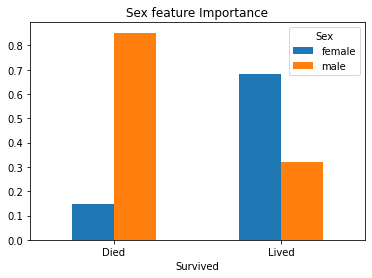

In [6]:
pd.crosstab(index=df['Survived'], columns=df['Sex'], values=df['Sex'].value_counts(), aggfunc='size', normalize='index').plot(kind='bar', rot=0, title='Sex feature Importance')

<AxesSubplot:xlabel='Survived'>

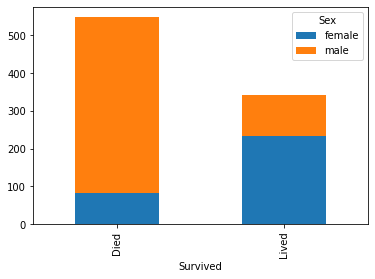

In [7]:
df.pivot_table(index='Survived', columns='Sex', aggfunc='size').plot(kind='bar', stacked=True)

In [8]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
X.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,male,22.0,7.2500,S
1,1,female,38.0,71.2833,C
2,3,female,26.0,7.9250,S
3,1,female,35.0,53.1000,S
4,3,male,35.0,8.0500,S


In [58]:
y = df['Survived']
y.head()

0     Died
1    Lived
2    Lived
3    Lived
4     Died
Name: Survived, dtype: object

In [12]:
X.isnull().sum()

Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

age_imputer = IterativeImputer()
emb_imputer = SimpleImputer(strategy='most_frequent')

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer


ohe = OneHotEncoder(handle_unknown='ignore')

emb_ct = make_column_transformer(
    (ohe, ['Sex', 'Embarked']),
    remainder='passthrough'
    ) 

ct = make_column_transformer(
    (age_imputer, ['Age', 'Fare']),
    (ohe, ['Sex', 'Embarked']),
    remainder='passthrough'
)

In [15]:
ct_test = ct.fit_transform(X)

In [16]:
ct_test[:10]

array([[22.        ,  7.25      ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  3.        ],
       [38.        , 71.2833    ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ],
       [26.        ,  7.925     ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  3.        ],
       [35.        , 53.1       ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ],
       [35.        ,  8.05      ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  3.        ],
       [29.11071877,  8.4583    ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  3.        ],
       [54.        , 51.8625    ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ],
       [ 2.        , 21.075     ,  0.        ,  1.        ,  0

In [17]:
from sklearn.pipeline import make_pipeline

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
RFCmodel = RandomForestClassifier(n_estimators=200, random_state=0)

In [20]:
pipe = make_pipeline(ct, RFCmodel)

In [21]:
pipe.fit(X, y)

C:\Users\Joshua\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('iterativeimputer',
                                                  IterativeImputer(),
                                                  ['Age', 'Fare']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Embarked'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=200, random_state=0))])

In [22]:
X.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,male,22.0,7.2500,S
1,1,female,38.0,71.2833,C
2,3,female,26.0,7.9250,S
3,1,female,35.0,53.1000,S
4,3,male,35.0,8.0500,S


In [23]:
test_X = test[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]

In [24]:
preds = pipe.predict(test_X)

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()

C:\Users\Joshua\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\Joshua\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\Joshua\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\Joshua\AppData\Local\Programs\Python\Python39\lib\site-

0.8025045508756513

In [27]:
preds.shape

(418,)

In [28]:
sub = test[['PassengerId']]
sub.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [29]:
sub['Survived'] = preds
sub.head()

C:\Users\Joshua\AppData\Local\Temp/ipykernel_6776/2508518161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['Survived'] = preds


,PassengerId,Survived
0,892,Died
1,893,Died
2,894,Died
3,895,Lived
4,896,Lived


In [30]:
gender_submission = pd.read_csv('gender_submission.csv')
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [31]:
sub.shape

(418, 2)

In [32]:
sub.to_csv('Submission.csv', index=False)

In [33]:
ct.named_transformers_['onehotencoder'].get_feature_names()

array(['x0_female', 'x0_male', 'x1_C', 'x1_Q', 'x1_S', 'x1_nan'],
      dtype=object)

In [34]:
emb_ct.fit_transform(X)

array([[ 0.    ,  1.    ,  0.    , ...,  3.    , 22.    ,  7.25  ],
       [ 1.    ,  0.    ,  1.    , ...,  1.    , 38.    , 71.2833],
       [ 1.    ,  0.    ,  0.    , ...,  3.    , 26.    ,  7.925 ],
       ...,
       [ 1.    ,  0.    ,  0.    , ...,  3.    ,     nan, 23.45  ],
       [ 0.    ,  1.    ,  1.    , ...,  1.    , 26.    , 30.    ],
       [ 0.    ,  1.    ,  0.    , ...,  3.    , 32.    ,  7.75  ]])

In [35]:
emb_ct.get_feature_names()

['onehotencoder__x0_female',
 'onehotencoder__x0_male',
 'onehotencoder__x1_C',
 'onehotencoder__x1_Q',
 'onehotencoder__x1_S',
 'onehotencoder__x1_nan',
 'Pclass',
 'Age',
 'Fare']

<AxesSubplot:>

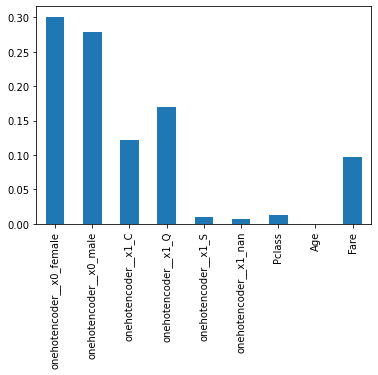

In [36]:
importances = RFCmodel.feature_importances_

feat_importance = pd.Series(importances, emb_ct.get_feature_names())

feat_importance.plot.bar()

In [37]:
df.Survived.value_counts().sum()

891

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
cat_model = DecisionTreeClassifier(max_depth=3, random_state=3)

In [46]:
cat_pipe = make_pipeline(ct, cat_model)

In [47]:
cross_val_score(cat_pipe, X, y, cv=5, scoring='accuracy').mean()

0.8091959073504487

In [48]:
from sklearn import tree

In [55]:
cat_pipe.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('iterativeimputer',
                                                  IterativeImputer(),
                                                  ['Age', 'Fare']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Embarked'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3, random_state=3))])

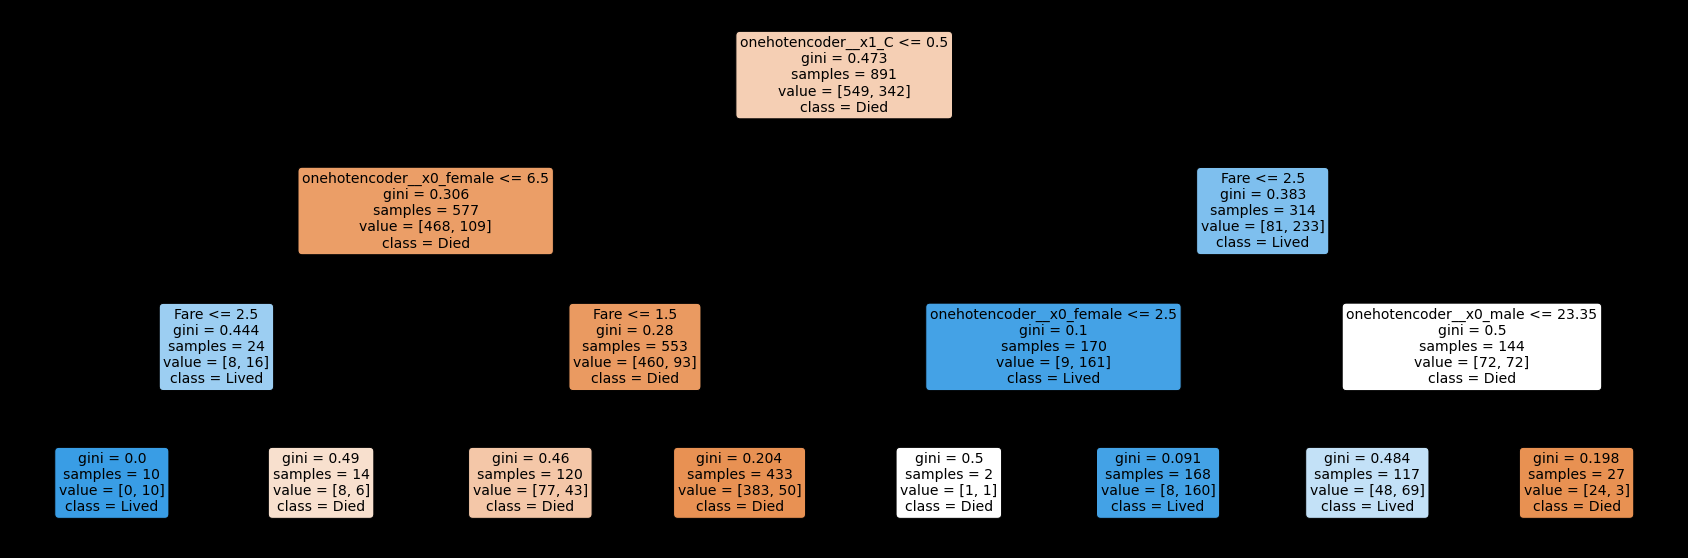

In [59]:
plt.figure(figsize=(30,10), facecolor ='k')
#create the tree plot
a = tree.plot_tree(cat_model,
                   #use the feature names stored
                   feature_names = emb_ct.get_feature_names(),
                   #use the class names stored
                   class_names = y.unique(),
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()